The Data used in the code is taken from LP DAKE book 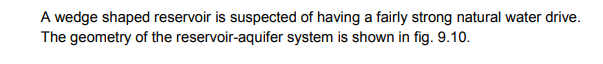

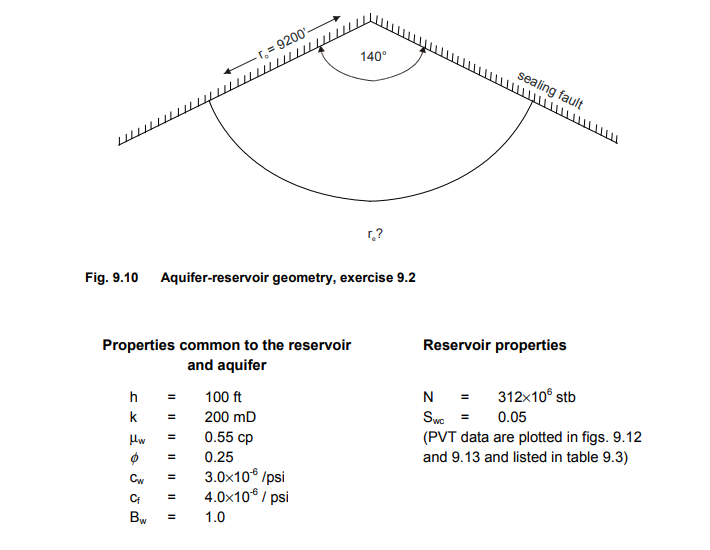

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import matplotlib.ticker as ticker
from matplotlib import style
df=pd.read_excel('Reservoir data.xlsx',)
df.head()

,Time(Years),Time(days),Pressure in OWC(psia),Plateau Pressure level (psia),Pressure difference,Np(MMstb),daily production data,Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf),Wd(ReD=5),Wd(ReD=5).1,We(MMrb)(ReD=10),We(MMrb)(ReD=5)
0,0,0,2740,2740,120,0.00,0.021589,650,1.404,650,0.00093,0.00,0.00,NaN,0.000
1,1,365,2500,2620,225,7.88,0.028877,760,1.374,592,0.00098,4.95,4.88,3.829,3.775
2,2,730,2290,2395,196,18.42,0.029397,845,1.349,545,0.00107,8.12,7.46,13.460,12.848
3,3,1095,2109,2199,170,29.15,0.031616,920,1.329,507,0.00117,10.90,9.10,26.462,24.024
4,4,1460,1949,2029,146,40.69,0.025890,975,1.316,471,0.00128,13.50,10.09,41.935,35.775


In [3]:

print(df)


    Time(Years)  Time(days)  Pressure in OWC(psia)  \
0             0           0                   2740   
1             1         365                   2500   
2             2         730                   2290   
3             3        1095                   2109   
4             4        1460                   1949   
5             5        1825                   1818   
6             6        2190                   1702   
7             7        2555                   1608   
8             8        2920                   1635   
9             9        3285                   1480   
10           10        3650                   1440   

    Plateau Pressure level (psia)  Pressure difference  Np(MMstb)  \
0                            2740                  120       0.00   
1                            2620                  225       7.88   
2                            2395                  196      18.42   
3                            2199                  170      29.15   
4     

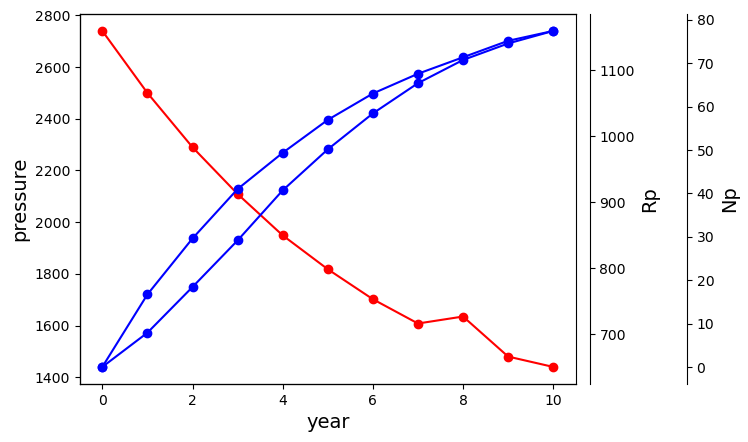

In [9]:
df4=df.iloc[3:]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df['Time(Years)'], df['Pressure in OWC(psia)'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("pressure",color="black",fontsize=14)

ax2=ax.twinx()
ax2.plot(df['Time(Years)'], df['Rp(scf/stb)'],color="blue",marker="o")
ax2.set_ylabel("Rp",color="black",fontsize=14)
ax2.spines['right'].set_position(('outward',10))


ax3=ax.twinx()
ax3.plot(df['Time(Years)'], df['Np(MMstb)'],color="blue",marker="o")
ax3.set_ylabel("Np",color="black",fontsize=14)
ax3.spines['right'].set_position(('outward',80))
plt.show()
style.use('default')

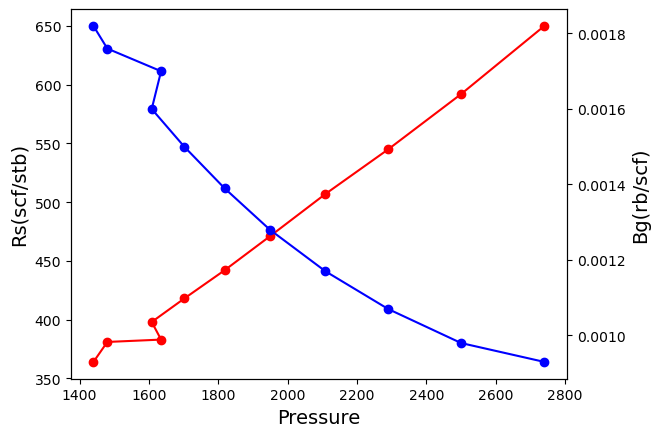

In [11]:
fig,ax = plt.subplots()
ax.plot(df['Pressure in OWC(psia)'], df['Rs(scf/stb)'], color="red", marker="o")
ax.set_xlabel("Pressure",fontsize=14)
ax.set_ylabel("Rs(scf/stb)",color="black",fontsize=14)

ax2=ax.twinx()
ax2.plot(df['Pressure in OWC(psia)'], df['Bg(rb/scf)'],color="blue",marker="o")
ax2.set_ylabel("Bg(rb/scf)",color="black",fontsize=14)
ax2.spines['right'].set_position(('outward',0))
plt.show()
style.use('default')

Text(0, 0.5, 'Bo(rb/stb)')

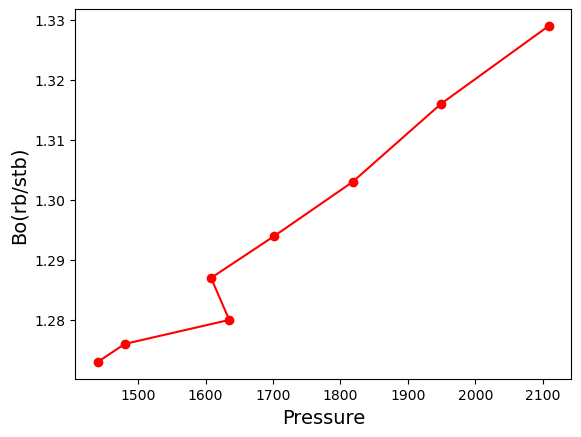

In [6]:
plt.plot(df['Pressure in OWC(psia)'], df['Bo(rb/stb)'], color="red", marker="o")
plt.xlabel("Pressure",fontsize=14)

plt.ylabel("Bo(rb/stb)",color="black",fontsize=14)

In [13]:
#F=Np(B0+(Rp-Rs)Bg)
#E0=((B0-Boi)+(Rsi-Rs)Bg)
F=df['Np(MMstb)']*(df['Bo(rb/stb)']+(df['Rp(scf/stb)']-df['Rs(scf/stb)'])*df['Bg(rb/scf)'])
df["F"]=F
Rsi=df.at[0,'Rs(scf/stb)']
Boi=df.at[0,'Bo(rb/stb)']
Eo=((df['Bo(rb/stb)']-Boi)+(Rsi-df['Rs(scf/stb)'])*df['Bg(rb/scf)'])
df["Eo"]=Eo
df['F/Eo']=df["F"]/df["Eo"]
df['We/Eo(reD=10)']=df["We(MMrb)(ReD=10)"]/df["Eo"]
df['We/Eo(reD=5)']=df["We(MMrb)(ReD=5)"]/df["Eo"]
df.head()

,Time(Years),Time(days),Pressure in OWC(psia),Plateau Pressure level (psia),Pressure difference,Np(MMstb),daily production data,Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf),Wd(ReD=5),Wd(ReD=5).1,We(MMrb)(ReD=10),We(MMrb)(ReD=5),F,Eo,F/Eo,We/Eo(reD=10),We/Eo(reD=5)
0,0,0,2740,2740,120,0.00,0.021589,650,1.404,650,0.00093,0.00,0.00,NaN,0.000,0.000000,0.00000,NaN,NaN,NaN
1,1,365,2500,2620,225,7.88,0.028877,760,1.374,592,0.00098,4.95,4.88,3.829,3.775,12.124483,0.02684,451.731863,142.660209,140.648286
2,2,730,2290,2395,196,18.42,0.029397,845,1.349,545,0.00107,8.12,7.46,13.460,12.848,30.761400,0.05735,536.380122,234.699215,224.027899
3,3,1095,2109,2199,170,29.15,0.031616,920,1.329,507,0.00117,10.90,9.10,26.462,24.024,52.825921,0.09231,572.266510,286.664500,260.253494
4,4,1460,1949,2029,146,40.69,0.025890,975,1.316,471,0.00128,13.50,10.09,41.935,35.775,79.797973,0.14112,565.461825,297.158447,253.507653


In [14]:
print(df)

    Time(Years)  Time(days)  Pressure in OWC(psia)  \
0             0           0                   2740   
1             1         365                   2500   
2             2         730                   2290   
3             3        1095                   2109   
4             4        1460                   1949   
5             5        1825                   1818   
6             6        2190                   1702   
7             7        2555                   1608   
8             8        2920                   1635   
9             9        3285                   1480   
10           10        3650                   1440   

    Plateau Pressure level (psia)  Pressure difference  Np(MMstb)  \
0                            2740                  120       0.00   
1                            2620                  225       7.88   
2                            2395                  196      18.42   
3                            2199                  170      29.15   
4     

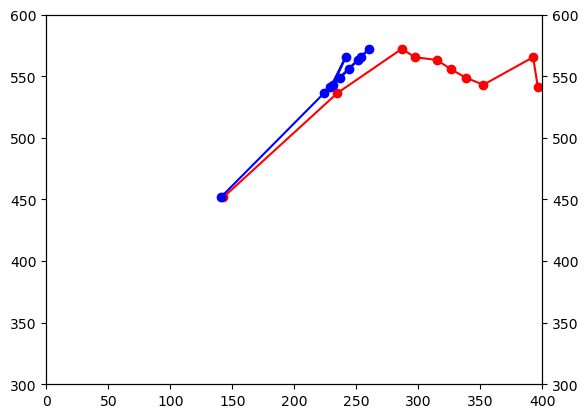

In [15]:
fig,ax = plt.subplots()
ax.plot(df['We/Eo(reD=10)'], df['F/Eo'], color="red", marker="o")
ax.set_ylim(300,600)
ax.set_xlim(0,400)
#ax.set_xlabel("Pressure",fontsize=14)
#ax.set_ylabel("Rs(scf/stb)",color="black",fontsize=14)

ax2=ax.twinx()
ax2.plot(df['We/Eo(reD=5)'], df['F/Eo'],color="blue",marker="o")
ax2.set_ylim(300,600)
ax2.set_xlim(0,400)


#ax2.set_ylabel("Bg(rb/scf)",color="black",fontsize=14)
#ax2.spines['right'].set_position(('outward',0))
plt.show()
style.use('default')

The corresponding values of We/Eo, required for the material balance calculations, are
listed in a dataframe .

As can be seen, in this case, all the points lie on the straight line of unit slope which intercepts the ordinate at Np = 310 MMstb, thus confirming that reD = 5 is the correct value of the ratio of the aquifer/reservoir radius.

Also apparent from this plot is the fact that after the third year there occurs a reversal in
the trend of plotted points with both We/ Eo and F/Eo decreasing with time. Havlena and
Odeh have pointed out. 

this reversal is to be expected for a finite acting aquifer but nevertheless all points, for the correct value of reD, must lie on the linear trend.

For the incorrect aquifer model (reD = 10), however, the calculated values of We/Eo continually increase as F/Eo decrease, as illustrated in the plot.


[(0.0, 260.2534936626583)]

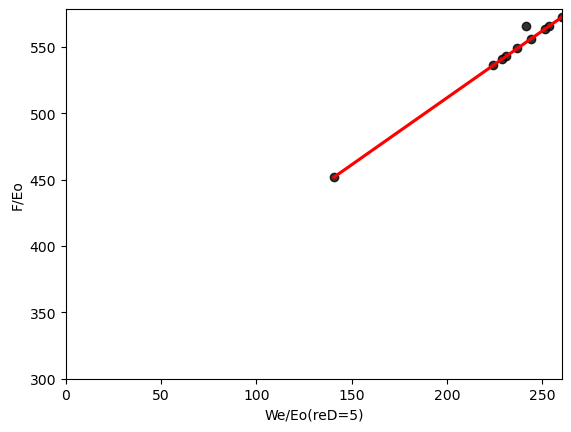

In [16]:
import seaborn as sb
# delete a single row by index value 0
df1 = df.drop(labels=0, axis=0)

g=sb.regplot(x = df['We/Eo(reD=5)'],
            y = df['F/Eo'], 
            robust=True, ci=None,
            data = df1, line_kws={"color": "red"},scatter_kws={"color": "black"})
g.set(ylim=(300, None))
g.set(xlim=(0, None))



In [21]:
df2 = df.iloc[:-1 , :]

time_column = df2.loc[:,'Time(days)']
t = time_column.values
dailyproduction_column = df2.loc[:,'daily production data']
q = dailyproduction_column.values
print(q)
print(t)

[0.02158904 0.02887671 0.02939726 0.03161644 0.02589041 0.02268493
 0.01909589 0.01465753 0.01041096 0.00791781]
[   0  365  730 1095 1460 1825 2190 2555 2920 3285]


In [22]:
# normalize the time and rate data
t_normalized = t / max(t)
q_normalized = q / max(q)
print(t_normalized)
print(q_normalized)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.68284229 0.91334489 0.92980936 1.         0.81889081 0.71750433
 0.60398614 0.46360485 0.32928943 0.25043328]


In [23]:
# function for hyperbolic decline
def hyperbolic(t, qi, di, b):
    return qi / (np.abs((1 + b * di * t))**(1/b))


# fitting the data with the hyperbolic function
from scipy.optimize import curve_fit


popt, pcov = curve_fit(hyperbolic, t_normalized, q_normalized)

qi, di, b = popt


# de-normalize qi and di
qi = qi * max(q)
di = di / max(t)


print('Initial production rate:', np.round(qi, 10), 'MMSCF')
print('Initial decline rate:', np.round(di, 10), 'MMSCF/D')
print('Decline coefficient:', np.round(b, 5))
print(qi)
Npmax=qi/di
print('Npmax = ',Npmax)
#Cumulative produced oil up to the last year(a)
a=df.iat[10,5]
print('Cumulative produced oil up to the last year(a)',a)
STOIIP=Npmax+a
print("stock tank oil initially in place,STOIIP = Npmax + Cumulative produced oil up to the last year(a) = ",STOIIP)

Initial production rate: 0.02964908 MMSCF
Initial decline rate: 0.0001129746 MMSCF/D
Decline coefficient: -2.78172
0.029649079978234037
Npmax =  262.44033339760995
Cumulative produced oil up to the last year(a) 77.43
stock tank oil initially in place,STOIIP = Npmax + Cumulative produced oil up to the last year(a) =  339.87033339760995


Text(0, 0.5, 'Q(MMstb/day)')

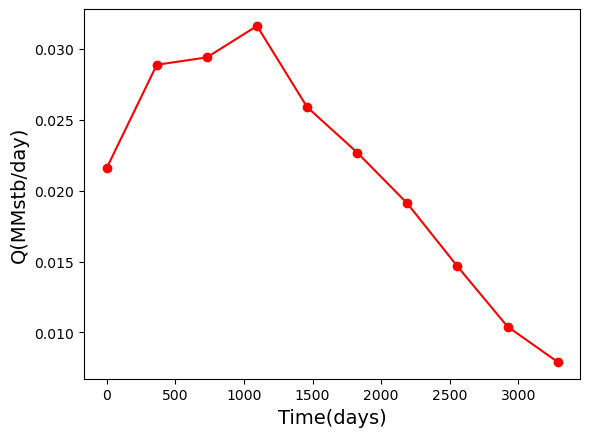

In [24]:

plt.plot(df['Time(days)'], df['daily production data'], color="red", marker="o")
plt.xlabel("Time(days)",fontsize=14)

plt.ylabel("Q(MMstb/day)",color="black",fontsize=14)

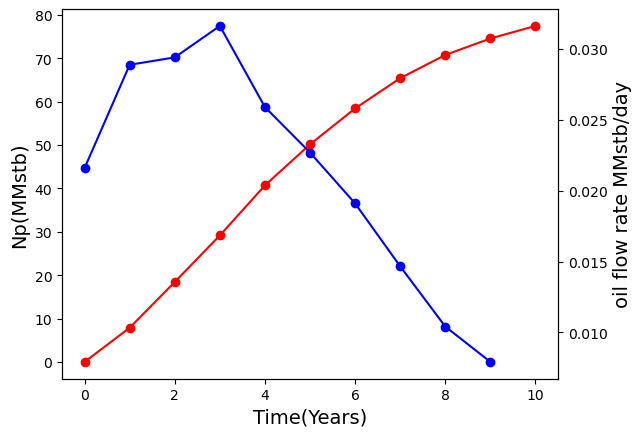

In [25]:
fig,ax = plt.subplots()
ax.plot(df['Time(Years)'] ,df['Np(MMstb)'], color="red", marker="o")
ax.set_xlabel("Time(Years)",fontsize=14)
ax.set_ylabel("Np(MMstb)",color="black",fontsize=14)

ax2=ax.twinx()
ax2.plot(df['Time(Years)'], df['daily production data'],color="blue",marker="o")
ax2.set_ylabel("oil flow rate MMstb/day",color="black",fontsize=14)
ax2.spines['right'].set_position(('outward',0))
plt.show()
style.use('default')

For the future prediction lets take the datset when the oil flow rate starts to decline 

In [29]:
df3=df2.iloc[3:]
time_column = df3.loc[:,'Time(days)']
t = time_column.values
dailyproduction_column = df3.loc[:,'daily production data']
q = dailyproduction_column.values
print(q)
print(t)
# normalize the time and rate data
t_normalized = t / max(t)
q_normalized = q / max(q)
print(t_normalized)
print(q_normalized)
# function for hyperbolic decline
def hyperbolic(t, qi, di, b):
    return qi / (np.abs((1 + b * di * t))**(1/b))


# fitting the data with the hyperbolic function
from scipy.optimize import curve_fit


popt, pcov = curve_fit(hyperbolic, t_normalized, q_normalized)

qi, di, b = popt


# de-normalize qi and di
qi = qi * max(q)
di = di / max(t)


print('Initial production rate:', np.round(qi, 10), 'MMSCF')
print('Initial decline rate:', np.round(di, 10), 'MMSCF/D')
print('Decline coefficient:', np.round(b, 5))



[0.03161644 0.02589041 0.02268493 0.01909589 0.01465753 0.01041096
 0.00791781]
[1095 1460 1825 2190 2555 2920 3285]
[0.33333333 0.44444444 0.55555556 0.66666667 0.77777778 0.88888889
 1.        ]
[1.         0.81889081 0.71750433 0.60398614 0.46360485 0.32928943
 0.25043328]
Initial production rate: 0.0454737746 MMSCF
Initial decline rate: 0.0002994526 MMSCF/D
Decline coefficient: -0.74783


In [20]:
# function for hyperbolic cumulative production
def cumpro(q_forecast, qi, di, b):
    
    return (((qi**b) / ((1 - b) * di)) * ((qi ** (1 - b)) - (q_forecast ** (1 - b))))  

In [99]:
# forecast gas rate until 1,500 days
t_forecast = np.arange(4100)
q_forecast = hyperbolic(t_forecast, qi, di, b)


# forecast cumulative production until 1,500 days
Qp_forecast = cumpro(q_forecast, qi, di,b)

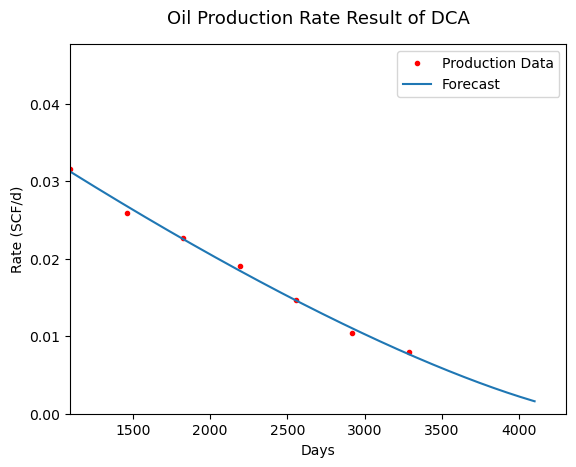

In [103]:

plt.plot(t, q, '.', color='red', label='Production Data')
plt.plot(t_forecast, q_forecast, label='Forecast')
plt.title('Oil Production Rate Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (SCF/d)')
plt.xlim(xmin=1095); plt.ylim(ymin=0)
plt.legend()
